In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
import yaml
import os
from os import path
from wordcloud import WordCloud
from copy import deepcopy
import seaborn as sns
import pandas as pd

In [2]:
def loadYaml(filename):

    with open(filename, 'r') as file:
        month_dict = yaml.load(file, Loader=yaml.FullLoader)
    return month_dict

In [3]:
def load_all_data(path):
    data = {}
    for file in os.listdir(path):
        if file.split('.')[-1] == 'yaml':
            print("Loading {0}".format(file))
            data[file.split('_')[0]] = loadYaml(os.path.join(path,file))
    return deepcopy(data)

In [4]:
data = load_all_data("final data_")

Loading Apr_AI_2020.yaml
Loading Aug_AI_2020.yaml
Loading Dez_AI_2020.yaml
Loading Feb_AI_2020.yaml
Loading Jan_AI_2020.yaml
Loading Jul_AI_2020.yaml
Loading Jun_AI_2020.yaml
Loading Mar_AI_2020.yaml
Loading May_AI_2020.yaml
Loading Nov_AI_2020.yaml
Loading Oct_AI_2020.yaml
Loading Sep_AI_2020.yaml


In [15]:
def generate_wordcloud(subredditname):
    # I create to empty lists the first one is to store the titles, but since the result will be a list of lists the goal with the second list is to unpack the first one so to speak
    title_list = []
    final_list = []
    # this code is mostly from till but should make intuitive sense
    # we go through every month
    for month in data.keys():
        # through every day
        for day in data[month]:
            # in every day we have a list of subs
            for sub in data[month][day]:
                # when looping through the list of subs only append title to the title list if its the subredditname you wanted in the first place
                if sub == subredditname:
                    title_list.append(data[month][day][sub]["title"])
    # this for loop is basically for unpacking the list of lists you ended up with
    for innerlist in title_list:
        for y in innerlist:
            final_list.append(y)
    title_string = ""
    title_string = " ".join(final_list)
    # finally return your final list which should have all titles in there
    with open(subredditname + '_Titles.txt', 'w', errors="ignore") as f:
        f.write(title_string)
    f.close()
    d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
    subreddit_text = open(path.join(d, subredditname + '_Titles.txt')).read()
    subreddit_wordcloud = WordCloud().generate(subreddit_text)
    return plt.imshow(subreddit_wordcloud, interpolation='bilinear')
    #plt.axis("off")
    # another option
    #return image = subreddit_wordcloud.to_file(subredditname + '_Wordcloud.png')
    

In [16]:
def generate_wordcloud_as_png(subredditname):
    # I create to empty lists the first one is to store the titles, but since the result will be a list of lists the goal with the second list is to unpack the first one so to speak
    title_list = []
    final_list = []
    # this code is mostly from till but should make intuitive sense
    # we go through every month
    for month in data.keys():
        # through every day
        for day in data[month]:
            # in every day we have a list of subs
            for sub in data[month][day]:
                # when looping through the list of subs only append title to the title list if its the subredditname you wanted in the first place
                if sub == subredditname:
                    title_list.append(data[month][day][sub]["title"])
    # this for loop is basically for unpacking the list of lists you ended up with
    for innerlist in title_list:
        for y in innerlist:
            final_list.append(y)
    title_string = ""
    title_string = " ".join(final_list)
    # finally return your final list which should have all titles in there
    with open(subredditname + '_Titles.txt', 'w', errors="ignore") as f:
        f.write(title_string)
    f.close()
    d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
    subreddit_text = open(path.join(d, subredditname + '_Titles.txt')).read()
    subreddit_wordcloud = WordCloud().generate(subreddit_text)
    return subreddit_wordcloud.to_file(subredditname + '_Wordcloud.png')
    

### Instructions
* simply call the generate_wordcloud function and insert the subreddit for which you want to create a word cloud as a parameter
* or use the generate_wordcloud_as_png function to save it as an image 

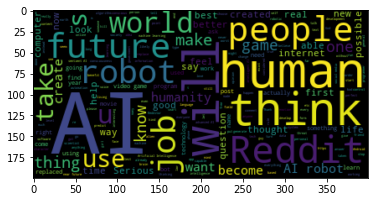

In [17]:
generate_wordcloud('AskReddit')